# VDR仿真

In [11]:
import math
import random
import matplotlib.pyplot as plt

dt=1#步长
s=10#均布距离
l=6#车长，同时也是元胞长度
v_max=40/l#最大速度
p_0=0.75#静止车辆的慢化概率
p=1/10#运动车辆的慢化概率

In [12]:
class Cell:#元胞定义
    def __init__(self,ID=0,CL=8,X=0,V=0,T=3600):
        self.ID=ID#元胞ID
        self.l=CL#元胞长度
        self.x=[X for t in range(T)]#元胞位置
        self.v=[V for t in range(T)]#元胞速度

In [13]:
class Lane:#车道定义
    def __init__(self,ID=0,LL=1000,Circle=0,T=3600):
        self.ID=ID#车道ID
        self.L=LL#车道长度
        if Circle==1:#周期边界
            self.Cells=[Cell(n,CL=l,X=n*s,T=T) for n in range(int(LL/s))]#直接均布设置车辆
        else:#本题忽略开放边界
            pass

In [14]:
class Space:#元胞空间定义
    def __init__(self,SL=1000,ln=1,Circle=0,T=3600,DT=0):
        self.L=SL#元胞空间总长
        if Circle==1:#设置边界条件
            self.Lanes=[Lane(l,SL,Circle) for l in range(ln)]
        else:
            pass
        if DT!=0:#设置路段检测器
            self.DT=[Detector(n*SL/DT) for n in range(DT)]

In [15]:
class Detector:#检测器定义
    def __init__(self,X=0):
        self.x=X#检测器位置
        self.v=0#平均速度
        self.q=0#平均流量

In [16]:
def RDM(v=0):#随机慢化概率
    u=random.uniform(0,1)
    if v==0:
        if u<p_0:
            return 1
        else:
            return 0
    else:
        if u<p:
            return 1
        else:
            return 0

In [17]:
def NS(C1,C0,t,LN,Circle=0,Detectors=None):#NS模型原本
    #加速
    C1.v[t+1]=min(C1.v[t]+1,v_max)
    #减速
    if C0.x[t]-C1.x[t]>0:
        C1.v[t+1]=min(C1.v[t+1],C0.x[t]-C1.x[t]-l)
    else:
        C1.v[t+1]=min(C1.v[t+1],C0.x[t]+LN.L-C1.x[t]-l)
    #随机慢化
    if RDM(C1.v[t]):
        C1.v[t+1]=max(C1.v[t+1]-1,0)
    #位置更新
    C1.x[t+1]=C1.x[t]+C1.v[t+1]
    if Circle==1:
        if C1.x[t+1]>=LN.L:
            C1.x[t+1]=C1.x[t+1]-LN.L
    #检测器数据更新
    for DT in Detectors:
        if (C1.x[t]<DT.x and C1.x[t+1]>DT.x) or (DT.x==0 and C1.x[t]>C1.x[t+1]):
            DT.v+=C1.v[t+1]
            DT.q+=1

In [18]:
def Simulation(L=1000,ln=1,Circle=0,T=3600,DT=0):#仿真+可视化
    
    T=int(T/dt)
    SPC=Space(L,ln,Circle,T,DT)
    plt.rcParams["font.family"] = 'Arial Unicode MS'
    plt.figure(figsize=(10,7))
    plt.xlabel("位置/m")
    plt.ylabel("时间/s")
    plt.title("时空图")
    
    #仿真
    for t in range(T-1):
        for LN in SPC.Lanes:
            for n in range(len(LN.Cells)):
                if n!=len(LN.Cells)-1:
                    NS(LN.Cells[n],LN.Cells[n+1],t,LN,Circle,SPC.DT)
                else:
                    NS(LN.Cells[n],LN.Cells[0],t,LN,Circle,SPC.DT)
            X=[C.x[t] for C in LN.Cells]
            tT=[t for i in range(len(X))]
            plt.scatter(X,tT,0.3,c='k')
    
    #检测器数据
    for DT in SPC.DT:
        DT.v=DT.v/DT.q
        DT.q=DT.q/(T*dt)
        print("检测器位置：",DT.x,"平均速率：",DT.v,"平均流量",DT.q)
    plt.show()

In [19]:
L=1*1000
ln=1
Circle=1
T=1*60*60
DT=3

#### 当密度为50辆/km

检测器位置： 0.0 平均速率： 6.487426431246602 平均流量 0.17305555555555555
检测器位置： 333.3333333333333 平均速率： 6.469972451790584 平均流量 0.16805555555555557
检测器位置： 666.6666666666666 平均速率： 6.461372231226308 平均流量 0.1713888888888889


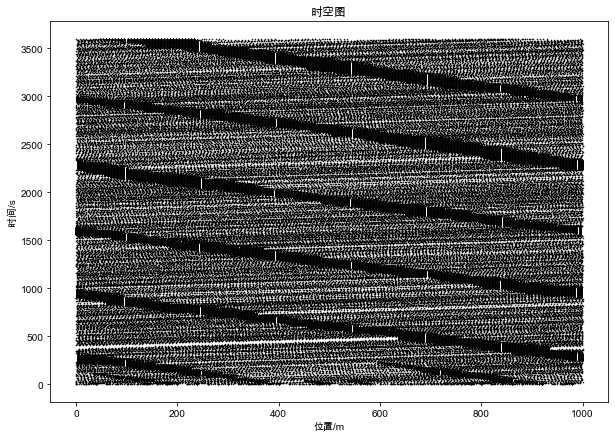

In [9]:
Results=Simulation(L,ln,Circle,T,DT)

#### 当密度为20辆/km

检测器位置： 0.0 平均速率： 6.556263269639035 平均流量 0.13083333333333333
检测器位置： 333.3333333333333 平均速率： 6.581920903954771 平均流量 0.13111111111111112
检测器位置： 666.6666666666666 平均速率： 6.5675866949751995 平均流量 0.13083333333333333


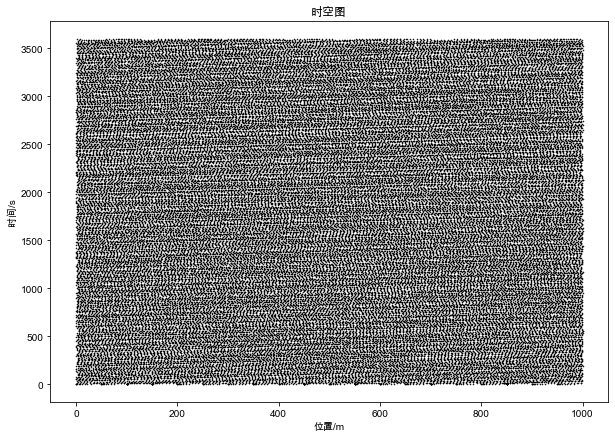

In [10]:
Results=Simulation(L,ln,Circle,T,DT)

#### 当密度为100辆/km

检测器位置： 0.0 平均速率： 5.968481375358198 平均流量 0.09694444444444444
检测器位置： 333.3333333333333 平均速率： 5.939047619047634 平均流量 0.09722222222222222
检测器位置： 666.6666666666666 平均速率： 5.9729981378026356 平均流量 0.09944444444444445


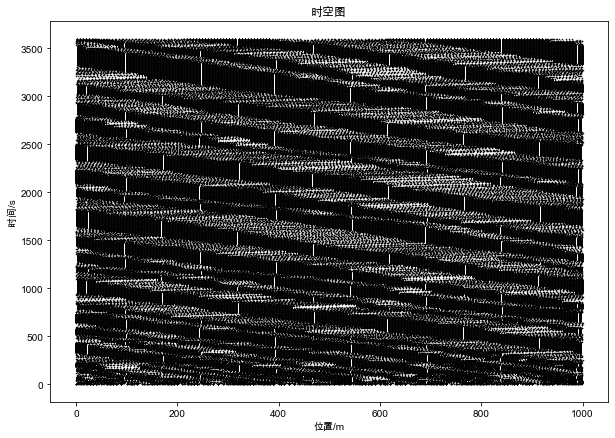

In [20]:
Results=Simulation(L,ln,Circle,T,DT)

> Sofarja@outlook.com
>
> ---
>
> 21018116
>
> 郭艺铧
>
> 交通工程